In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig

In [2]:
# load datasets
input = np.load("../../model/middle_output_bidirectional/small/input.npy",allow_pickle=True) 
input2 = np.load("../../model/middle_output_bidirectional/small/input2.npy",allow_pickle=True) 
output = np.load("../../model/middle_output_bidirectional/small/output.npy",allow_pickle=True) 
label = np.load("../../model/middle_output_bidirectional/small/label.npy",allow_pickle=True) 
label = np.argmax(label, axis=-1)
print(label.shape)

(4704,)


In [3]:
stack = output

fig = plt.figure()
tsne = TSNE(n_components=2, init='pca', random_state=0)
print(stack.shape)
result = tsne.fit_transform(stack)
print(result.shape)
#fig = plot_embedding(result, label,'t-SNE embedding of the digits')
x_min, x_max = np.min(result, 0), np.max(result, 0)
result = (result - x_min) / (x_max - x_min)

(4704, 64)
(4704, 2)


<Figure size 640x480 with 0 Axes>

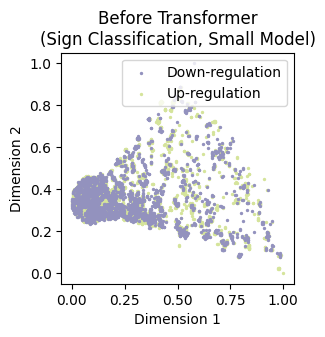

In [4]:
# classification
color = ["#9392BE","#D5E49B"]
#color = ["#B0E0E6","#EE6363"]

ax = plt.subplots(figsize=(3,3))
for i in range(result.shape[0]):
    if(label[i] == 1):
        s2 = plt.scatter(result[i, 0], result[i, 1],s=2,color=color[label[i]])
for i in range(result.shape[0]):
    if(label[i] == 0):
        s1 = plt.scatter(result[i, 0], result[i, 1],s=2,color=color[label[i]])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Before Transformer\n(Sign Classification, Small Model)')
plt.legend((s1,s2),('Down-regulation','Up-regulation') ,loc = 'best')
plt.savefig('../images/tsne/bigru-output-small-sign.png',dpi=300, bbox_inches = 'tight')
plt.show()

In [5]:
# load datasets
input = np.load("../../model/middle_output_slope_bidirectional/small/input.npy",allow_pickle=True) 
input2 = np.load("../../model/middle_output_slope_bidirectional/small/input2.npy",allow_pickle=True) 
output = np.load("../../model/middle_output_slope_bidirectional/small/output.npy",allow_pickle=True) 
label = np.load("../../model/middle_output_slope_bidirectional/small/label.npy",allow_pickle=True) 
print(label.shape)

(4704,)


In [6]:
stack = output

fig = plt.figure()
tsne = TSNE(n_components=2, init='pca', random_state=0)
print(stack.shape)
result = tsne.fit_transform(stack)
print(result.shape)
#fig = plot_embedding(result, label,'t-SNE embedding of the digits')
x_min, x_max = np.min(result, 0), np.max(result, 0)
result = (result - x_min) / (x_max - x_min)

(4704, 64)
(4704, 2)


<Figure size 640x480 with 0 Axes>

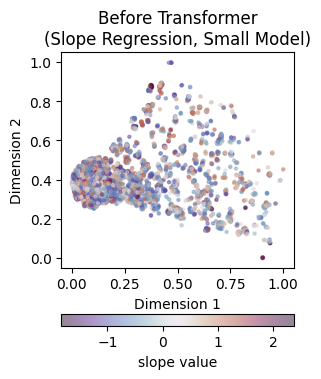

In [7]:
num = result.shape[0]
ax = plt.subplots(figsize=(3,4))
sizes = label

plt.scatter(result[:,0], result[:,1], c=sizes, s=5, cmap='twilight_shifted', alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Before Transformer\n(Slope Regression, Small Model)')
plt.colorbar(label='slope value', orientation='horizontal') 
plt.savefig('../images/tsne/bigru-output-small-slope.png',dpi=300, bbox_inches = 'tight')
plt.show()